Dyslexia Classification using Machine Learning Algorithms

Members: Aarya Mujumdar, Prasanna Tapkire, Ayush Shete

Group No. 27





In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or self._allowed_to_proceed(

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt# doctest: +SKIP
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#Reading the dataset
data=pd.read_csv('/content/drive/My Drive/labeled_dysx.csv')
#Value to be predicted by the model.
y=data.Label
#Input taken by the model.
X=data.drop(['Label'],axis=1)
data.head()

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score,Label
0,0.5,0.6,0.5,0.8,0.6,0.7,1
1,0.6,0.7,0.8,0.9,0.5,0.8,2
2,0.6,0.4,0.3,0.3,0.4,0.6,1
3,0.3,0.5,0.2,0.1,0.3,0.5,0
4,0.7,0.6,0.7,0.8,0.9,0.5,2


In [ ]:
len(data)

500

In [ ]:
class_count = data[data['Label'] == 0].shape[0]

print(f'The number of samples for label 0 is: {class_count}')

The number of samples for label 0 is: 62


In [ ]:
class_count1 = data[data['Label'] == 1].shape[0]

print(f'The number of samples for label 1 is: {class_count1}')

The number of samples for label 1 is: 273


In [ ]:
class_count2 = data[data['Label'] == 2].shape[0]

print(f'The number of samples for label 2 is: {class_count2}')

The number of samples for label 2 is: 165


In [ ]:
#In the given data, the label is the indication for whether the person has dislexia or not.
#Label = 0 means that there is a high chance that the person has dyslexia.
#Label = 1 means that there is a moderate chance that the person has dyslexia.
#Label = 2 means that there is a low chance that the person has dyslexia.

In [ ]:
#The following test cases will be used to check the values given by each model.
test1 = np.array([[0.5, 0.1, 0.2, 0.8, 0.3, 0.5]]) #Readings for applicant 1.
test2 = np.array([[0.7, 0.9, 0.4, 0.9, 0.3, 0.8]]) #Readings for applicant 2.
test3 = np.array([[0.1, 0.7, 0.2, 0.6, 0.9, 0.6]]) #Readings for applicant 3.
test4 = np.array([[0.3, 0.4, 0.5, 0.3, 0.3, 0.5]]) #Readings for applicant 4.

In [ ]:
#Creating the test and train data sets for the given data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=10)
#list to store accuracy values of each model
accuracy = [0,0,0]
#list to store precision values of each model.
precision = [0, 0, 0]
#list to store recall values of each model.
recall = [0, 0, 0]
#list to store f1-score values of each model.
fscore = [0, 0, 0]
#list to store error in predictions of each model.
error = [.0, .0, .0]

In [ ]:
#StandardScalar is used for preprocessing of data.
#'copy' is False, which means copies are avoid and inplace scaling is done instead.
# This means that the scaler computes the mean and standard deviation of each feature in X_train and then scales the features based on these statistics.
sc=StandardScaler(copy=False)
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.40859278,  0.09423675,  0.57481025,  1.09456548,  0.51247074,
         0.54374235],
       [ 2.0828266 ,  0.54298319, -0.30276265,  0.14688974,  0.01971041,
         0.54374235],
       [ 0.0896911 ,  0.09423675,  0.1360238 , -1.27462388, -0.47304992,
         0.1016754 ],
       ...,
       [-0.90687665, -0.80325613, -0.7415491 , -1.74846175, -1.45857058,
        -1.22452545],
       [-0.90687665,  0.54298319, -0.30276265,  0.14688974, -0.47304992,
         0.1016754 ],
       [ 0.58797497,  0.09423675,  0.57481025,  2.04224123, -0.47304992,
         0.54374235]])

In [ ]:
#Creating lists of label outputs given in each test case by different models
label_1 = [0, 0, 0]
label_2 = [0, 0, 0]
label_3 = [0, 0, 0]
label_4 = [0, 0, 0]

In [ ]:
#Decision Tree

In [ ]:
#Creating the DecisionTree model.
dt = DecisionTreeClassifier(random_state = 1)
#Training the model.
dt.fit(X_train, y_train)
#Making predictions using the decision tree model.
pred_dt = dt.predict(X_test)
#Calculating error
error[0] = round(mean_absolute_error(y_test, pred_dt), 3)

In [ ]:
#Testing the model with predefined test cases.
ans_1 = dt.predict((test1))
ans_2 = dt.predict((test2))
ans_3 = dt.predict((test3))
ans_4 = dt.predict((test4))

#Storing the above predictions into respective lists.
label_1[0] = ans_1[0]
label_2[0] = ans_2[0]
label_3[0] = ans_3[0]
label_4[0] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Random Classifier

In [ ]:
#Creating the RandomClassifier model.
rf = RandomForestClassifier(random_state = 0)
#Training the model.
rf.fit(X_train, y_train)
#Making predictions using the model.
pred_rf = rf.predict(X_test)
#Calculating error
error[1] = round(mean_absolute_error(y_test, pred_rf), 3)
#Testing the model with predefined test cases.
ans_1 = rf.predict((test1))
ans_2 = rf.predict((test2))
ans_3 = rf.predict((test3))
ans_4 = rf.predict((test4))

#Storing the above predictions into respective lists.
label_1[1] = ans_1[0]
label_2[1] = ans_2[0]
label_3[1] = ans_3[0]
label_4[1] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#SVM

In [ ]:
#Creating the SVM model.
svm = SVC(kernel = "linear")
#Training the model.
svm.fit(X_train, y_train)
#Making predictions using the model.
pred_svm = svm.predict(X_test)
#Calculating error
error[2] = round(mean_absolute_error(y_test, pred_svm), 3)
#Testing the model with predefined test cases.
ans_1 = svm.predict((test1))
ans_2 = svm.predict((test2))
ans_3 = svm.predict((test3))
ans_4 = svm.predict((test4))

#Storing the above predictions into respective lists.
label_1[2] = ans_1[0]
label_2[2] = ans_2[0]
label_3[2] = ans_3[0]
label_4[2] = ans_4[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#list of models
models = ['DecisionTree', 'RandomForest','SVM\t']
print('Model\t\tError')
for i in range(3):
    print('{}\t{}'.format(models[i],error[i]))

Model		Error
DecisionTree	0.162
RandomForest	0.072
SVM		0.075


In [ ]:
#Error is minimum in RandomForest Model.
#We can't decide the best model for the given dataset only on the basis of error.
#In order to find the best fit, we need to consider precision and recall as well.

In [ ]:
#Printing label lists
print(label_1)
print(label_2)
print(label_3)
print(label_4)

[2, 2, 1]
[2, 2, 2]
[1, 1, 1]
[1, 1, 1]


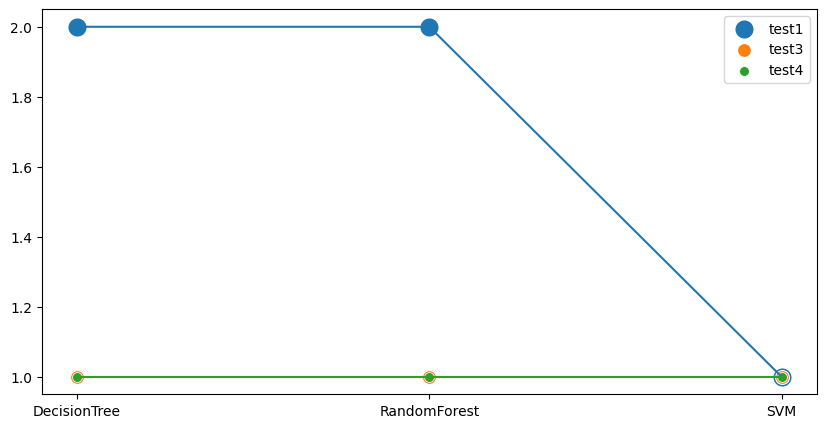

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM'],
                y = label_1, s = 200, label = 'test1',)
# sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM'],
#                 y = label_2, s = 150, label = 'test2')
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM'],
                y = label_3, s = 100, label = 'test3')
sns.scatterplot(x = ['DecisionTree', 'RandomForest','SVM'],
                y = label_4, s = 50, label = 'test4')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM'],
                y = label_1)
# sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM'],
#                 y = label_2)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM'],
                y = label_3)
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM'],
                y = label_4)
plt.show()

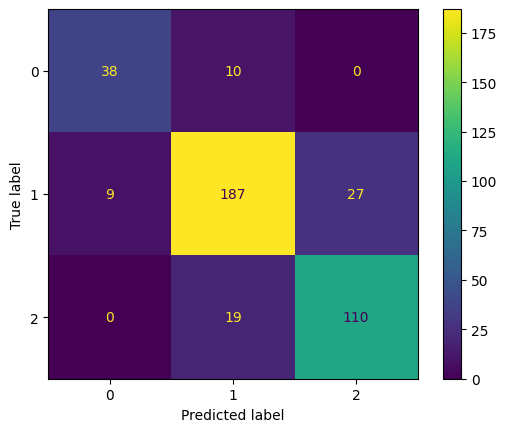

For a DecisionTreeClassifier: Precision = 0.826, Recall = 0.828, F1-score = 0.826, Accuracy = 0.838


In [ ]:
#Confusion matrix for Decision tree model.
cm = confusion_matrix(np.array(y_test), pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
disp.plot()
plt.show()
#Finding precision, recall and f-score for Decision Tree Model and updating values in respective lists.
precision[0], recall[0], fscore[0], Nil = precision_recall_fscore_support(y_test, pred_dt, average='macro')
accuracy[0] = accuracy_score(y_test, pred_dt)
print('For a DecisionTreeClassifier: Precision = %.3f, Recall = %.3f, F1-score = %.3f, Accuracy = %.3f' % (precision[0], recall[0], fscore[0], accuracy[0]))

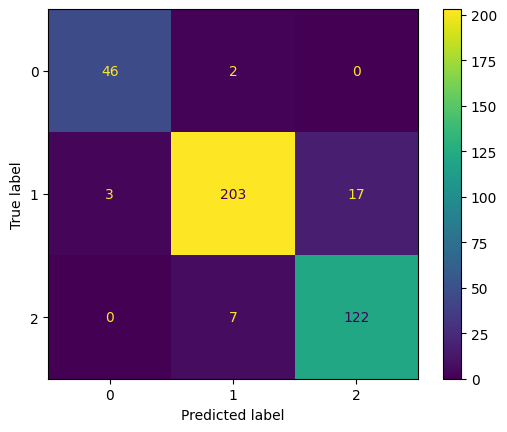

For a RandomForestClassifier:  Precision = 0.925, Recall = 0.938, F1-score = 0.931, Accuracy = 0.927


In [ ]:
#Confusion matrix for RandomForest model.
cm_1 = confusion_matrix(np.array(y_test), pred_rf)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1,display_labels=[0,1,2])
disp_1.plot()
plt.show()
#Finding precision, recall and f-score for RandomForest Model and updating values in respective lists.
precision[1], recall[1], fscore[1], Nil = precision_recall_fscore_support(y_test, pred_rf, average='macro')
accuracy[1] = accuracy_score(y_test, pred_rf)
print('For a RandomForestClassifier:  Precision = %.3f, Recall = %.3f, F1-score = %.3f, Accuracy = %.3f' %(precision[1], recall[1], fscore[1],accuracy[1]))

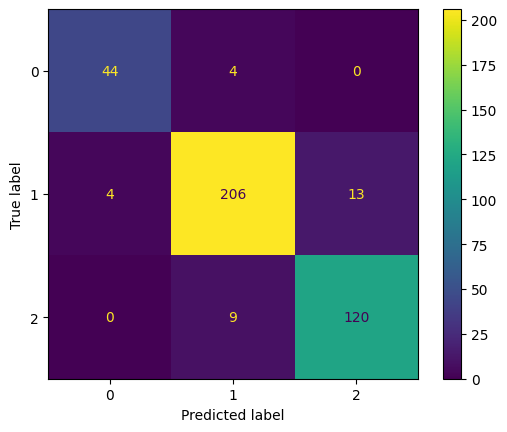

For an SVM model: Precision = 0.920, Recall = 0.924, F1-score = 0.922, Accuracy = 0.925


In [ ]:
#Confusion matrix for SVM model
cm_2 = confusion_matrix(np.array(y_test), pred_svm)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=[0,1,2])
disp_2.plot()
plt.show()
#Finding precision, recall and f-score for SVM model and updating values in respective lists.
precision[2], recall[2], fscore[2], Nil = precision_recall_fscore_support(y_test, pred_svm, average='macro')
accuracy[2] = accuracy_score(y_test, pred_svm)
print('For an SVM model: Precision = %.3f, Recall = %.3f, F1-score = %.3f, Accuracy = %.3f' % (precision[2], recall[2], fscore[2], accuracy[2]))

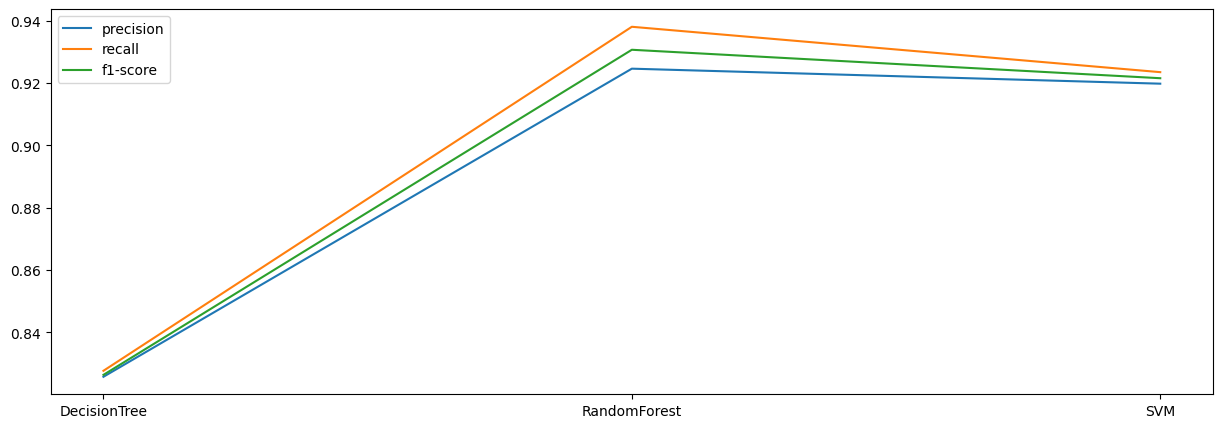

In [ ]:
#Creating a line plot to compare teh precision, recall and f1-score of all the models.
#This graph is plotted to find the best fit for our dataset.
plt.figure(figsize=(15,5))
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM'],
             y = precision,label = 'precision')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM'],
             y = recall,label = 'recall')
sns.lineplot(x = ['DecisionTree', 'RandomForest','SVM'],
             y = fscore,label = 'f1-score')
plt.show()

In [ ]:
# List of possible n_estimators values
n_est = [10, 100, 500, 1000]
best_score = 0
best_n_estimators = None
accuracy_scores = []
error_scores = []

for n_estimators in range(1,200):
    # Create a Random Forest model with the current n_estimators value
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=0)

    # Train the model on the training set
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    predictions = model.predict(X_test)

    # Evaluate the model's performance using the F1 score
    score = f1_score(y_test, predictions, average='macro')
    error = 1 - model.score(X_test, y_test)

    # Append accuracy and error to their respective lists
    accuracy_scores.append(score)
    error_scores.append(error)

    # Check if this model's score is better than the current best score
    if score > best_score:
        best_score = score
        best_n_estimators = n_estimators

# Train a Random Forest model with the best n_estimators value on the entire training set
best_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=0)
best_model.fit(X_train, y_train)

# Make predictions using the best model on the test set
predictions = best_model.predict(X_test)

# Print the best value of n_estimators
print('Best value of n_estimators for RandomForest model is:', best_n_estimators)


Best value of n_estimators for RandomForest model is: 134


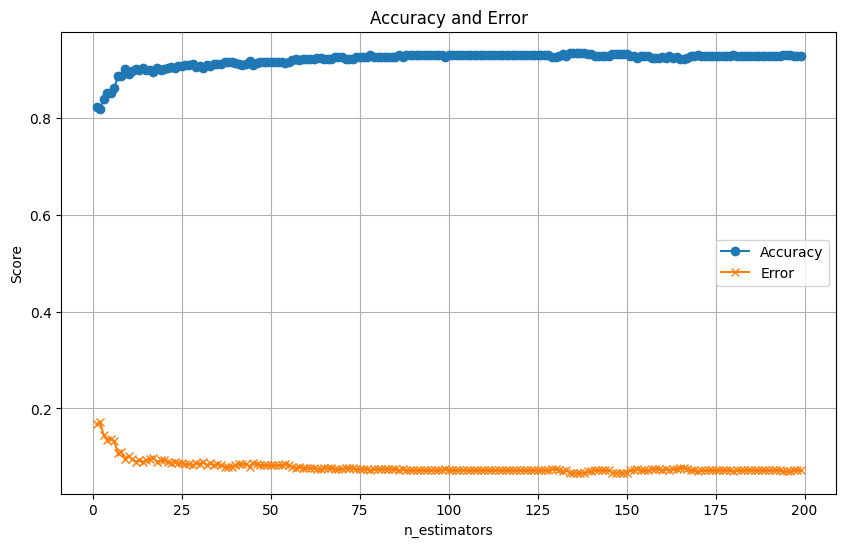

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), accuracy_scores, label='Accuracy', marker='o')
plt.plot(range(1, 200), error_scores, label='Error', marker='x')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Accuracy and Error')
plt.legend()
plt.grid()
plt.show()

In [ ]:
precision_best, recall_best, fscore_best, Nil = precision_recall_fscore_support(y_test, predictions, average='macro')
accuracy_best = accuracy_score(y_test, predictions)
print('For a RandomForestClassifier: Precision = %.3f, Recall = %.3f, F1-score = %.3f, Accuracy = %.3f' % (precision_best, recall_best, fscore_best, accuracy_best))

For a RandomForestClassifier: Precision = 0.929, Recall = 0.942, F1-score = 0.935, Accuracy = 0.932


In [ ]:
#Testing the model with predefined test cases.
ans_1 = int(best_model.predict((test1)))
ans_2 = int(best_model.predict((test2)))
ans_3 = int(best_model.predict((test3)))
ans_4 = int(best_model.predict((test4)))
print(ans_1)

2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Therefore the most accurate results for all the applicants are as follows.
possibility = {0: "High", 1: "Moderate", 2: "Low"}
print('Applicant\tLabel\tPossibility of Dyslexia')
print('1\t\t{}\t\t{}'.format(ans_1, possibility[ans_1]))
print('2\t\t{}\t\t{}'.format(ans_2, possibility[ans_2]))
print('3\t\t{}\t\t{}'.format(ans_3, possibility[ans_3]))
print('4\t\t{}\t\t{}'.format(ans_4, possibility[ans_4]))

Applicant	Label	Possibility of Dyslexia
1		2		Low
2		2		Low
3		1		Moderate
4		1		Moderate


User Input


In [ ]:
#Getting input from user
name = input("Enter name of applicant: ")
print("\nThe scores of all the tests in quiz as well as survey need to be entered.")
print("All the values lie in the range 0 to 1.\n")
lang_vocab = float(input("Enter the score of Language Vocab test: "))
memory = float(input("Enter the score of Memory test: "))
speed = float(input("Enter the score of Speed test: "))
visual = float(input("Enter the score of Visual Discrimination test: "))
audio = float(input("Enter the score of Audio Discrimination test: "))
survey = float(input("Enter the score obtained from Survey: "))

Enter name of applicant: a

The scores of all the tests in quiz as well as survey need to be entered.
All the values lie in the range 0 to 1.

Enter the score of Language Vocab test: 0.1
Enter the score of Memory test: 0.2
Enter the score of Speed test: 0.3
Enter the score of Visual Discrimination test: 0.4
Enter the score of Audio Discrimination test: 0.5
Enter the score obtained from Survey: 0.6


In [ ]:
#Creating a 2D array from the given scores.
#Input taken by our model is a 2D array.
#get_result function can be run to get result from the survey.
def get_result(lang_vocab, memory, speed, visual, audio, survey):
    #2D numpy array created with the values input by the user.
    array = np.array([[lang_vocab, memory, speed, visual, audio, survey]])
    #The output given by model is converted into an int and stored in label.
    label = int(best_model.predict(array))
    #Giving final output to user depending upon the model prediction.
    if(label == 0):
        output = "There is a high chance of the applicant to have dyslexia."
    elif(label == 1):
        output = "There is a moderate chance of the applicant to have dyslexia."
    else:
        output = "There is a low chance of the applicant to have dyslexia."
    return output

In [ ]:
get_result(lang_vocab, memory, speed, visual, audio, survey)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'There is a moderate chance of the applicant to have dyslexia.'